# __A simple linear regression model__
#### predicting height using weight

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('height-weight.csv')
data.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


In [3]:
data.shape

(23, 2)

In [4]:
X = pd.DataFrame(data['Weight'])
Y = pd.DataFrame(data['Height'])

In [5]:
## Train-Test Split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.4,random_state=42)

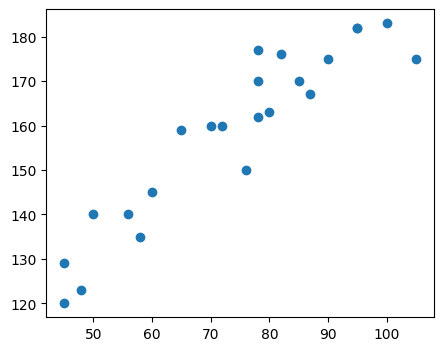

In [6]:
## EDA
plt.figure(figsize=(5,4))
plt.scatter(X,Y)

In [7]:
min_height = Y.min().values[0]
corresponding_weight_min = data.loc[data['Height'] == min_height, 'Weight'].values
print(f"The minimum height is {min_height}cm and corresponding weight(s): {corresponding_weight_min[0]}kg")

max_height = Y.max().values[0]
corresponding_weight_max = data.loc[data['Height'] == max_height, 'Weight'].values
print(f"The maximum height is {max_height}cm and corresponding weight(s): {corresponding_weight_max[0]}kg")


The minimum height is 120cm and corresponding weight(s): 45kg
The maximum height is 183cm and corresponding weight(s): 100kg


In [8]:
# Feature Scaling - Standardize the weight feature
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_train

array([[ 1.44537162],
       [-1.82811811],
       [-0.84607119],
       [-0.19137325],
       [ 0.20144552],
       [-1.50076914],
       [-1.10795037],
       [-0.06043366],
       [ 1.11802265],
       [ 0.59426429],
       [ 0.79067367],
       [ 0.92161326],
       [ 0.4633247 ]])

In [9]:
# For SLR, we add dummy feature
from sklearn.preprocessing import add_dummy_feature
X_train_b = add_dummy_feature(X_train)
X_train_b

array([[ 1.        ,  1.44537162],
       [ 1.        , -1.82811811],
       [ 1.        , -0.84607119],
       [ 1.        , -0.19137325],
       [ 1.        ,  0.20144552],
       [ 1.        , -1.50076914],
       [ 1.        , -1.10795037],
       [ 1.        , -0.06043366],
       [ 1.        ,  1.11802265],
       [ 1.        ,  0.59426429],
       [ 1.        ,  0.79067367],
       [ 1.        ,  0.92161326],
       [ 1.        ,  0.4633247 ]])

In [10]:
# The normal equation
Theta = np.linalg.inv(X_train_b.T @ X_train_b) @ X_train_b.T @ y_train
Theta

,Height
0,158.230769
1,14.872878


In [11]:
# Prediction
y_predict = X_train_b @ Theta
y_predict

,Height
0,179.727605
1,131.041392
2,145.647256
3,155.384498
4,161.226844
5,135.910013
6,141.752359
7,157.331947
8,174.858983
9,167.069189


In [12]:
# RSME Error
from sklearn.metrics import root_mean_squared_error
err = root_mean_squared_error(y_train,y_predict)
err

4.744837325274484

In [13]:
## The SVM Method 
Theta, residual, rank, s = np.linalg.lstsq(X_train_b,y_train)
Theta

array([[158.23076923],
       [ 14.87287783]])

In [14]:
residual

array([292.67525616])

__Its the same__

### The above all is just for understanding 
#### Developing pipeline now

In [ ]:
from sklearn.pipeline import Pipeline

pipe = Pipeline(
    [('scaler',StandardScaler())]
)

In [29]:
pipe.fit_transform(X_train,y_train)

array([[ 1.44537162],
       [-1.82811811],
       [-0.84607119],
       [-0.19137325],
       [ 0.20144552],
       [-1.50076914],
       [-1.10795037],
       [-0.06043366],
       [ 1.11802265],
       [ 0.59426429],
       [ 0.79067367],
       [ 0.92161326],
       [ 0.4633247 ]])

In [35]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)
y_predict = regressor.predict(X_train)
y_predict

array([[179.72760475],
       [131.0413919 ],
       [145.64725576],
       [155.38449833],
       [161.22684387],
       [135.91001319],
       [141.75235873],
       [157.33194684],
       [174.85898346],
       [167.06918941],
       [169.99036218],
       [171.93781069],
       [165.12174089]])

In [37]:
## Error 
rsme = root_mean_squared_error(y_train,y_predict)
rsme

4.744837325274482

### How to see if model is reliable? 
1. Scatter plot of y_test vs y_predict is linear
2. residual = y_test - y_predict. Distribution of residuals is normal distribution
3. Scatter plot of residuals vs y_predict is randomly distributed over 0

In [43]:
### Use test data
pipe.fit_transform(X_test)
regressor = LinearRegression()
regressor.fit(X_test,y_test)
y_predict = regressor.predict(X_test)

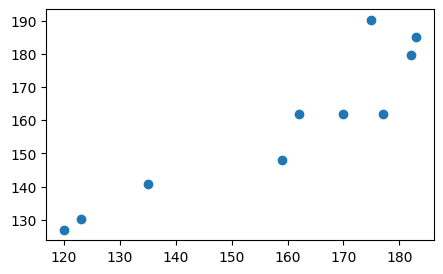

In [50]:
## Method 1 
plt.figure(figsize=(5,3))
plt.scatter(y_test,y_predict)

<Axes: ylabel='Count'>

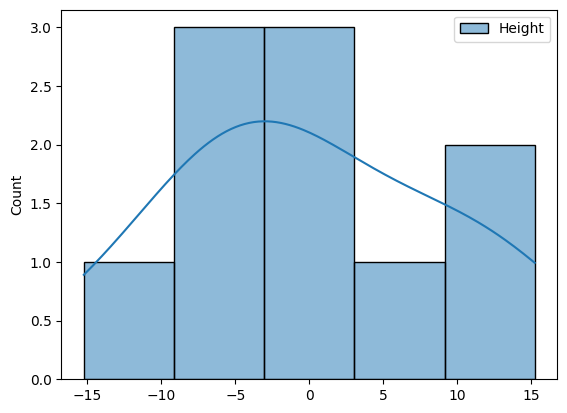

In [58]:
## Method 2 
import seaborn as sns
residuals = y_test - y_predict
sns.histplot(residuals,kde=True)

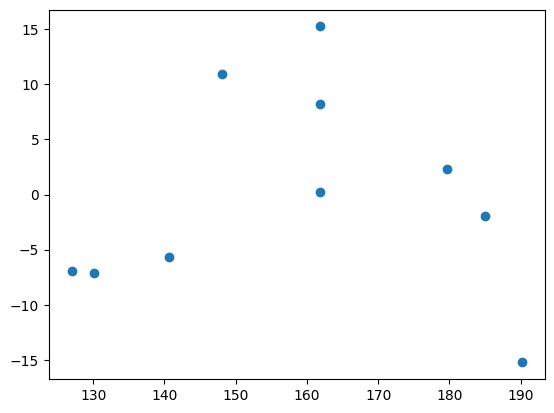

In [59]:
## Method 3
plt.scatter(y=residuals,x=y_predict)